# haberman survival data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#importing haberman's-survival-data-set
hsd = pd.read_csv("E:/Aravind/applied ai/data-sets/haberman.csv")
#many data-points and features?
print(hsd.shape)

(306, 4)


* here data-points are no. of rows i.e 306,no. of features are here-no.of columns i.e 4

In [22]:
print(hsd.columns)
print("*************************")
print(hsd.head())
print("*************************")
print(hsd.tail())

Index(['age', 'op_yr', 'axil_node_det', 'surv_status'], dtype='object')
*************************
   age  op_yr  axil_node_det  surv_status
0   30     62              3            1
1   30     65              0            1
2   31     59              2            1
3   31     65              4            1
4   33     58             10            1
*************************
     age  op_yr  axil_node_det  surv_status
301   76     67              0            1
302   77     65              3            1
303   78     65              1            2
304   83     58              2            2
305   30     64              1            1


In [3]:
hsd['age'].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

In [4]:
hsd['op_yr'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: op_yr, dtype: int64

In [5]:
hsd['axil_node_det'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: axil_node_det, dtype: int64

In [6]:
hsd['surv_status'].value_counts()

1    225
2     81
Name: surv_status, dtype: int64

# For the above dataset the column or attributes are as follows
 * age of the patient at the time of operation which is named here as ['age']
 * year of the patients at the time of operation which is termed as ['op_yr']
 * auxillary nodes detected for the patient which is termed as ['axil_node_det']
 * survival status of the patient '1'->who lived for morethan 5 years,'2'->who died within 5 years....(note:all are numericals)

In [7]:
#lets find any null values in the given dataset
print(hsd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age              306 non-null int64
op_yr            306 non-null int64
axil_node_det    306 non-null int64
surv_status      306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [8]:
#calculate the various MEAN,STD,MIN(i.e various statistical operations )
print(hsd.describe())

              age       op_yr  axil_node_det  surv_status
count  306.000000  306.000000     306.000000   306.000000
mean    52.457516   62.852941       4.026144     1.264706
std     10.803452    3.249405       7.189654     0.441899
min     30.000000   58.000000       0.000000     1.000000
25%     44.000000   60.000000       0.000000     1.000000
50%     52.000000   63.000000       1.000000     1.000000
75%     60.750000   65.750000       4.000000     2.000000
max     83.000000   69.000000      52.000000     2.000000


* Now lets have a look how many patients lived before and after 5 years

In [9]:
print(hsd.iloc[:,-1].value_counts())

1    225
2     81
Name: surv_status, dtype: int64


* From the above output patients who lived morethan 5 yrs are -> 225(since '1' has 225 values),less than 5 yrs are -> 81(since '2' has 81 values)     

In [10]:
print(hsd.iloc[:,-1].value_counts(normalize=True))

1    0.735294
2    0.264706
Name: surv_status, dtype: float64


* From the above output patients who lived morethan 5 yrs are about 73%,lessthan 5 yrs are about 26%  

# 1 bivariant analysis

# 1.1 (2-D)scatter plot

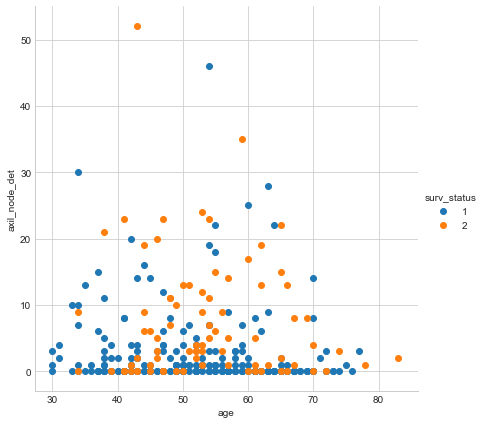

In [33]:
sns.FacetGrid(hsd,hue="surv_status",size=6).map(plt.scatter,'age','axil_node_det').add_legend()
plt.show()

# observation
   * 1.majority patients have '0' auxiliary nodes
   * 2.general conclusion is not possible bcz blue,orange pts are coinciding each other
   * 3.we need to check using some other plots to have proper conclusion

# 2 multivariant analysis

# 2.1pair-plot

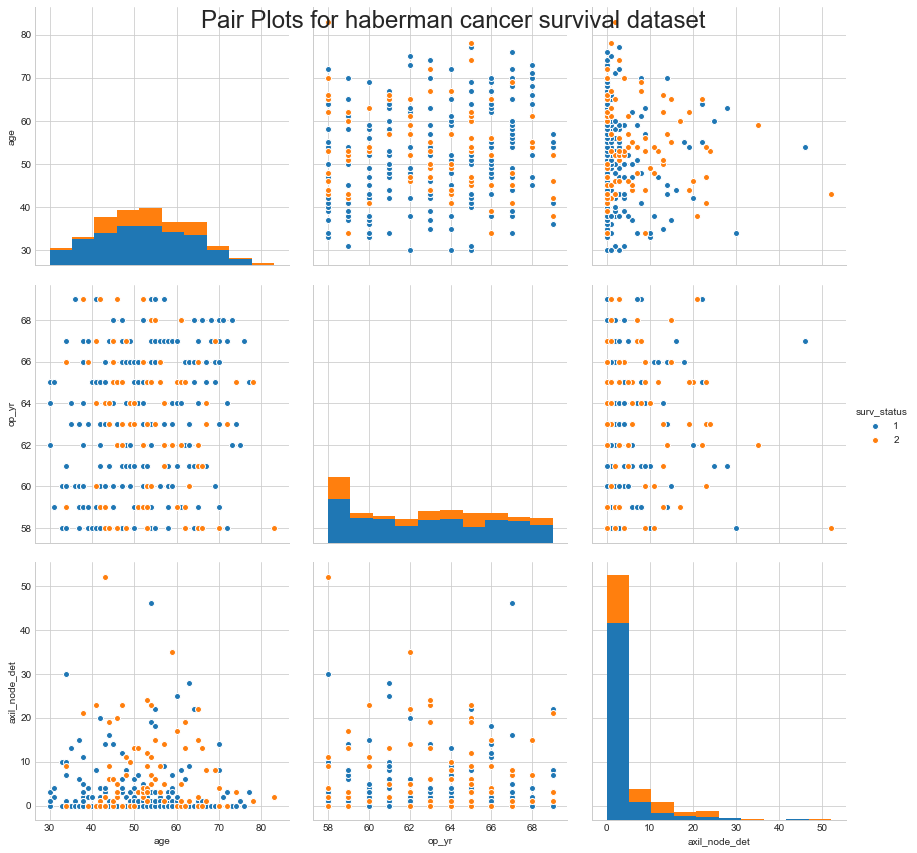

In [30]:
sns.set_style("whitegrid");
sns.pairplot(hsd, hue="surv_status",size=4,diag_kind="hist",vars=['age','op_yr','axil_node_det']);
plt.suptitle('Pair Plots for haberman cancer survival dataset', 
             size = 24);
plt.show()

# observation:
  * 1.from the above plots only plot[0][2],[2][1](if we take numbering i.e 3,7)are considerable bcz 1,5,9 are histograms so          information cannot be obtained.
  * 2.remaining plots other than diagonal and 3,7 plots.all are overlapping with one another,and some are just same as other
     plots by rotating axis by 90d
  * 3.positive_lymph_nodes VERSUS Age is the useful plot to atleast get the insight that most people who survived have 0 postive lymph nodes detected.
  * in these plots also max points are being overlapped

# 3 univariate analysis

* uni variate analysis is to describe,summarize,and find some patterns in the single feature

# 3.1 PDF(probability density function)

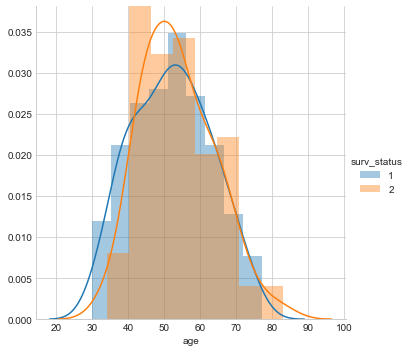

In [23]:
#1-diag
sns.set_style("whitegrid");
sns.FacetGrid(hsd, hue="surv_status", size=5).map(sns.distplot, "age").add_legend();
plt.show();

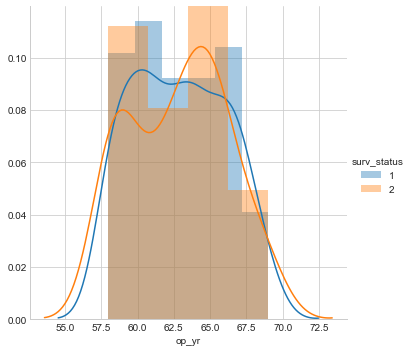

In [24]:
#2-diag
sns.FacetGrid(hsd, hue="surv_status", size=5).map(sns.distplot, "op_yr").add_legend();
plt.show();

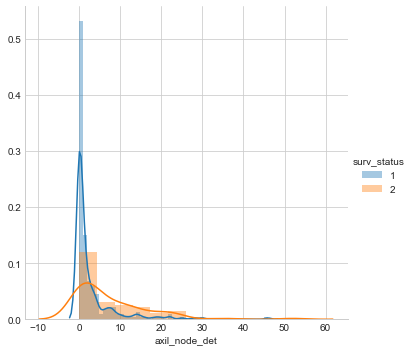

In [27]:
#3-diag
sns.FacetGrid(hsd, hue="surv_status", size=5).map(sns.distplot, "axil_node_det").add_legend();
plt.show();

# observation:
   * 1.In the above plotted pdfs i observed a better conclusion from pdf3(i.e from 3-diag)bcz when these nodes are less in number 
    then survival of the patient is high and same as viceversa
   * 2.remanining pdfs(1-diag,2-diag)may not be useful to give a conclusion

* instead of having three seprate analysis we can plot it with in single loop
 * for x,y in enumerate(list(hsd.columns)[:,-1]):
   * z=sns.FacetGrid(hsd,hue="surv_status",size=5)
   * z.map(sns.distplot,y).addlegend()
   * plt.show()

# 3.2 cumulative distribution function

*******PDF VALUES********
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
*******BIN EDGES********
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
*******CDF VALUES********
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


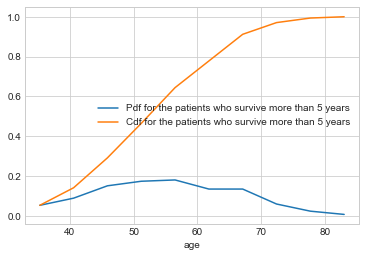

In [41]:
sns.set_style("whitegrid");
counts, bin_edges = np.histogram(hsd['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('*******PDF VALUES********')
print(pdf);
print('*******BIN EDGES********')
print(bin_edges);
cdf = np.cumsum(pdf)
print('*******CDF VALUES********')
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
plt.xlabel('age')
plt.show()

* from the above graph 80% patients had age between 60-65

*******PDF VALUES********
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
*******BIN EDGES********
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
*******CDF VALUES********
[0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


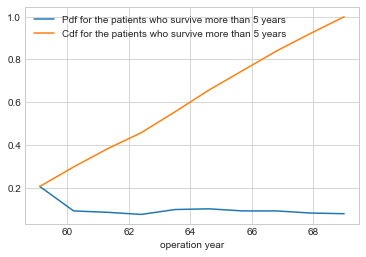

In [42]:
sns.set_style("whitegrid");
counts, bin_edges = np.histogram(hsd['op_yr'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('*******PDF VALUES********')
print(pdf);
print('*******BIN EDGES********')
print(bin_edges);
cdf = np.cumsum(pdf)
print('*******CDF VALUES********')
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
plt.xlabel('operation year')
plt.show()

* about nearly 80 % patients are having lymph nodes lessthan 5

*******PDF VALUES********
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
*******BIN EDGES********
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
*******CDF VALUES********
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


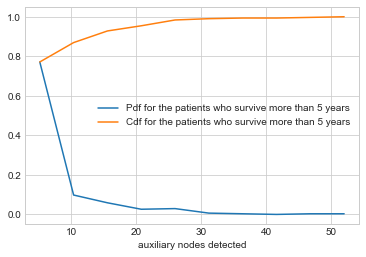

In [43]:
sns.set_style("whitegrid");
counts, bin_edges = np.histogram(hsd['axil_node_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('*******PDF VALUES********')
print(pdf);
print('*******BIN EDGES********')
print(bin_edges);
cdf = np.cumsum(pdf)
print('*******CDF VALUES********')
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
plt.xlabel('auxiliary nodes detected')
plt.show()

* from the above graph about 80% patients had operational years between 66-68(66-66.25)app

* i will consider cdf(axil_node_det)bcz i had good conclucion and observation of pdf(axil_node_det)

# observation
* From above CDF(axil_node_det) you can observe that orange line shows there is a 85% chance of long survival if number of axillary nodes detected are < 5. Also you can see as number of axillary nodes increases survival chances also reduces means it is clearly observed that 80% — 85% of people have good chances of survival if they have less no of auxillary nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >40

# 4 mean,var,std-dev

In [19]:
x=hsd.loc[hsd["surv_status"]==1]
x.describe()

,age,op_yr,axil_node_det,surv_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [20]:
y=hsd.loc[hsd["surv_status"]==2]
y.describe()

,age,op_yr,axil_node_det,surv_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# Observations:

* From both the tables we can observe that almost for all the features the statistics are similar except for positive_lymph_nodes.

* The mean(average) of positive_lymph_nodes is more for people who died within 5 years than people who have survived for more than 5 years

* From the observation of CDFs, we can infer that patients above 46 axillary nodes detected can be considered as dead within 5 years. So,People having less number of positive_lymph_node have survived.

* mean who survived is roughly around 52 and not survived around 54 

# 5 medians,quantiles,percentiles,mean absolute deviation

In [28]:
print("\nMedians:")
print(np.median(hsd['age']))
print(np.median(hsd['op_yr']))
print(np.median(hsd['axil_node_det']))
print('*******************************')
print(np.median(x["axil_node_det"]))
print(np.median(y["axil_node_det"]))

print("\nQuantiles:")
print(np.percentile(hsd['age'],np.arange(0, 100, 25)))
print(np.percentile(hsd['op_yr'],np.arange(0, 100, 25)))
print(np.percentile(hsd['axil_node_det'], np.arange(0, 100, 25)))
print('*******************************')
print(np.percentile(x["axil_node_det"],np.arange(0, 100, 25)))
print(np.percentile(y["axil_node_det"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(hsd['age'],90))
print(np.percentile(hsd['op_yr'],90))
print(np.percentile(hsd['axil_node_det'], 90))
print('******************************')
print(np.percentile(x['axil_node_det'], 90))
print(np.percentile(y['axil_node_det'], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hsd['age']))
print(robust.mad(hsd['op_yr']))
print(robust.mad(hsd['axil_node_det']))
print('*******************************')
print(robust.mad(x['axil_node_det']))
print(robust.mad(y['axil_node_det']))


Medians:
52.0
63.0
1.0
*******************************
0.0
4.0

Quantiles:
[30.   44.   52.   60.75]
[58.   60.   63.   65.75]
[0. 0. 1. 4.]
*******************************
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
67.0
67.0
13.0
******************************
8.0
20.0

Median Absolute Deviation
11.860817748044816
4.447806655516806
1.482602218505602
*******************************
0.0
5.930408874022408


# observation
   * From above observation it is clear that average auxillary nodes in x(who live more than 5 yrs) is 0 and for y(who live less than 5 yrs) it is 4. ie, Patients who have average 4 auxillary nodes will live less than 5 yrs
   * upto quartile 50% nodes are of '0' nodes,75th% of patients have nodes less than '3' nodes,25% patients are having more than '3' nodes.

# 6 box plots

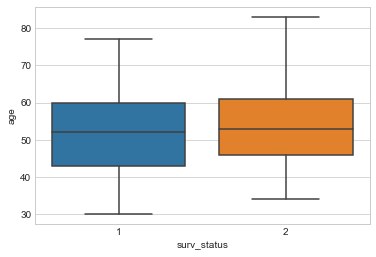

In [41]:
sns.boxplot(x='surv_status',y='age', data=hsd)
plt.show()

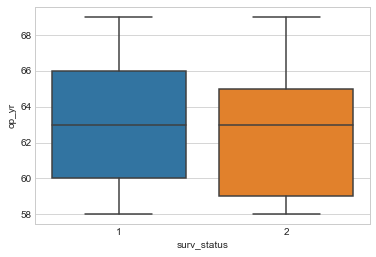

In [42]:
sns.boxplot(x='surv_status',y='op_yr', data=hsd)
plt.show()

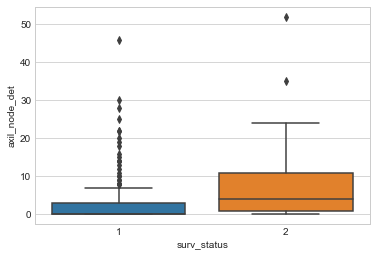

In [43]:
sns.boxplot(x='surv_status',y='axil_node_det', data=hsd)
plt.show()

# 7 violin plot

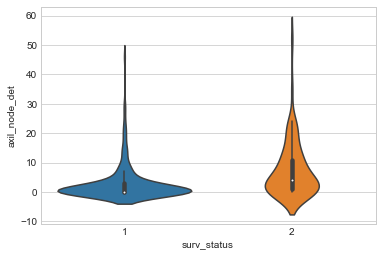

In [48]:
sns.violinplot(x='surv_status',y='axil_node_det', data=hsd, size=5)
plt.show()

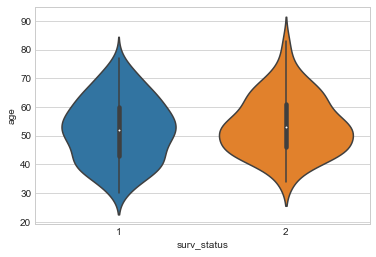

In [49]:
sns.violinplot(x='surv_status',y='age', data=hsd, size=5)
plt.show()

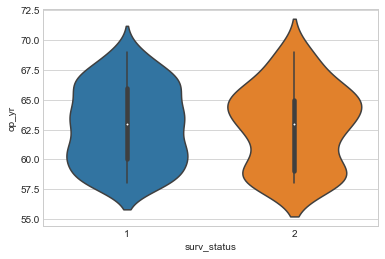

In [50]:
sns.violinplot(x='surv_status',y='op_yr', data=hsd, size=5)
plt.show()


# Observation:

* The number of positive lymph nodes(axil_node_det) of the survivors is highly densed from 0 to 5.
* Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.
* From box plots and violin plots, we can say that more no of patients who are dead had age between 45-61,year between 59-65 and the patients who survived have age between 42-60, year between 59-66.
* In above violin plot we observe that For long survive density for it is more near the 0 nodes and also it has whiskers in range o-7

# 8 counter plot

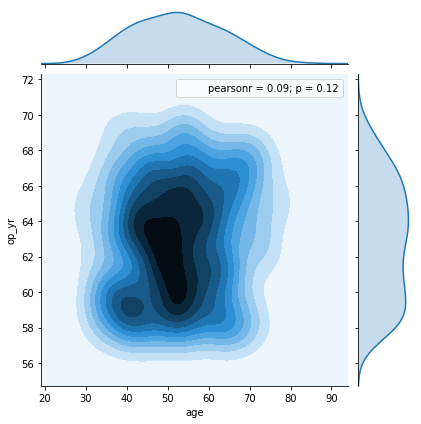

In [6]:
sns.jointplot(x="age", y="op_yr", data=hsd, kind="kde");
plt.show()

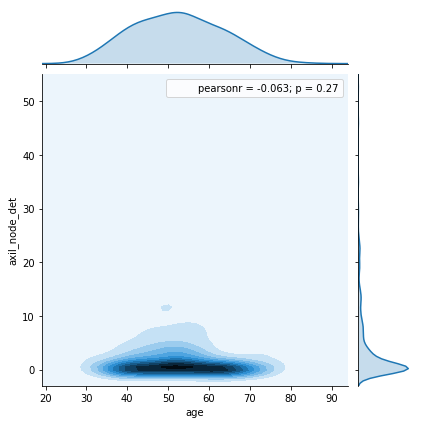

In [7]:
sns.jointplot(x="age", y="axil_node_det", data=hsd, kind="kde");
plt.show()

# observation
 * There are more number of people who had their operation during the year 1959 - 1964 period and between the ages 43 - 59.
 * from this it can be observed that patients who had their ages between 42-68 had auxiliary node i.e positive lymph nodes of 0-3

# conclusion
   * 1.There are 306 observations with 4 features in the data set.
   * 2.From the above output patients who lived morethan 5 yrs are -> 225(since '1' has 225 values),less than 5 yrs are ->       81(since '2' has 81 values)
   * 3.Using scatter plot(Bi-variate analysis) -
                  1.majority patients have '0' auxiliary nodes
                  2.general conclusion is not possible bcz blue,orange pts are coinciding each other
                  3.we need to check using some other plots to have proper conclusion
   * 4.Using Pair-plot concept(Bi-variate analysis)- 
                  1.from the above plots only plot[0][2],[2][1](if we take numbering i.e 3,7)are considerable bcz 1,5,9 are                       histograms so information cannot be obtained.
                  2.remaining plots other than diagonal and 3,7 plots.all are overlapping with one another,and some are just                       same as other plots by rotating axis by 90d
                  3.positive_lymph_nodes VERSUS Age is the useful plot to atleast get the insight that most people who survived                   have '0' postive lymph nodes detected.in these plots also max points are being overlapped
   * 5.Using PDFs(Uni-variate Analysis)-
                  1.age,op_yr distributions are not useful bcz distibution is more similar for both people who survived(>5                         yrs) and also dead(<5 yrs).
                  2.axil_node_det is the only feature that is useful to know about the survival status of patients as there is                     difference between the distributions for both classes(labels). 
   * 6.Using CDFs(Uni-variate analysis)-
                  1.axil_node_det distribution plot is useful,patients having less positive nodes have more chance of living                       where as with nodes 45+ can be considered to live lessthan 5 yrs
   * 7.The mean of positive_lymph_nodes is more for people who died within 5 years(54 yrs) than people who have survived for            more than 5 years(52 yrs).
   * 8.Using Box plot and Violin plots-
                  1.The number of positive lymph nodes(axil_node_det) of the survivors is highly densed from 0 to 5.
                  2.Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.
   * 9.Using Contour plot-
                  1.There are more number of people who had their operation during the year 1959 - 1964 period and between the                     ages 43 - 59.
                  